# ***LINEAR DISCRIMINANT ANALYSIS [LDA]***

# ***Table of content***

>[LINEAR DISCRIMINANT ANALYSIS [LDA]](#scrollTo=ARJIImFsV7lO)

>>[Implementing a Linear Discriminant Analysis (LDA) model from scratch using Python, considering the mathematical concepts involved and step-by-step coding procedures?](#scrollTo=JfB29z8jB_uE)

>>[Implementing Linear Discriminant Analysis (LDA) using the scikit-learn library in Python, and how can you leverage its functionalities to efficiently apply LDA for dimensionality reduction and classification in my machine learning project?](#scrollTo=xo2f2jT0yUxq)

>>>[Another example](#scrollTo=BonSIOMMi29D)



## ***Implementing a Linear Discriminant Analysis (LDA) model from scratch using Python, considering the mathematical concepts involved and step-by-step coding procedures?***

Import the necessary libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

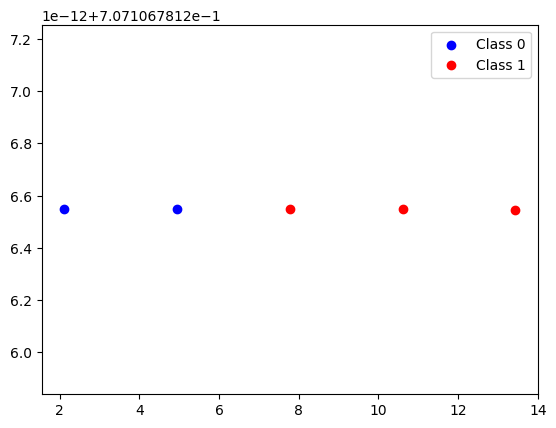

In [ ]:
from scipy.stats import multivariate_normal

# Define the data
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]])
y = np.array([0, 0, 1, 1, 1])

# Calculate the mean and covariance of each class
mean_0 = np.mean(X[y == 0], axis=0)
mean_1 = np.mean(X[y == 1], axis=0)
cov_0 = np.cov(X[y == 0], rowvar=False)
cov_1 = np.cov(X[y == 1], rowvar=False)

# Calculate the within-class scatter matrix
Sw = cov_0 + cov_1

# Calculate the between-class scatter matrix
Sb = np.dot((mean_0 - mean_1).reshape(-1, 1), (mean_0 - mean_1).T.reshape(1, -1))

# Calculate the eigenvalues and eigenvectors of the within-class scatter matrix
eigenvalues, eigenvectors = np.linalg.eig(Sw)

# Sort the eigenvalues and eigenvectors in decreasing order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Select the first two eigenvectors
W = eigenvectors[:, :2]

# Project the data onto the subspace spanned by the first two eigenvectors
X_projected = np.dot(X, W)

# Plot the projected data
plt.scatter(X_projected[y == 0, 0], X_projected[y == 0, 1], c='blue', label='Class 0')
plt.scatter(X_projected[y == 1, 0], X_projected[y == 1, 1], c='red', label='Class 1')
plt.legend()
plt.show()

Generated a random data to apply LDA manually.

In [ ]:
np.random.seed(42)

n_samples = 200
X = np.random.randn(n_samples, 2)
y = np.random.randint(0, 2, n_samples)

df = pd.DataFrame(np.c_[X, y], columns=['feature_1', 'feature_2', 'label'])
df

,feature_1,feature_2,label
0,0.496714,-0.138264,0.0
1,0.647689,1.523030,0.0
2,-0.234153,-0.234137,0.0
3,1.579213,0.767435,0.0
4,-0.469474,0.542560,1.0
...,...,...,...
195,-0.898415,0.491919,1.0
196,-1.320233,1.831459,1.0
197,1.179440,-0.469176,1.0
198,-1.713135,1.353872,0.0


Here, we see that x has feature 1 and feature 2 which is randomly generated. Whereas y is a class assigned to these features. Here we have two classes 0 and 1.

After making a data frame, we find the mean of x and y along with the covaraince.

In [ ]:
mean_x = df.groupby('label')[['feature_1', 'feature_2']].mean()
mean_x

,feature_1,feature_2
label,,
0.0,0.062780,-0.005981
1.0,-0.056036,0.088200


The mean of x, here for feature1 and feature2 is displayed above.

In [ ]:
cov_x = df.groupby('label')[['feature_1', 'feature_2']].cov()
cov_x

feature_1  feature_2
label                                
0.0   feature_1   0.793837   0.056776
      feature_2   0.056776   0.811446
1.0   feature_1   1.056337  -0.112091
      feature_2  -0.112091   1.068672

The covariance of x with the 'label' is displayed above.

In [ ]:
mean_y = np.mean(df['label'])
mean_y

0.475

In [ ]:
cov_y = np.cov(df['label'].values.reshape(-1, 1), rowvar=False)
cov_y

array(0.25062814)

Similarly the mean and covariance of y is displayed above.

In [ ]:
cov_w = np.zeros((2, 2))
for label in df['label'].unique():
    cov_w += np.cov(df.loc[df['label'] == label][['feature_1', 'feature_2']].values, rowvar=False)

cov_b = np.zeros((2, 2))
for label in df['label'].unique():
    mean_vec = mean_x.loc[label].values.reshape(2, 1)
    cov_b += (mean_vec - mean_y).dot((mean_vec - mean_y).T)

Above, we have found the covariance within the classes and covariance between the classes.

Covariance within the classes is given by \
$cov_x + cov_y$

Covariance between the classes is given by \
$(mean_x - mean_y) (mean_x - mean_y)^T$

where, T is transpose

In [ ]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(cov_w).dot(cov_b))

We have found the eigen values and eigen vectors.

Eigen values is found by using the below formula\
$(cov_x)^{-1} (cov_b) * w = λ * w$\
where w is the eigen vector and λ is the eigen value

By using\
$((cov_x)^{-1} (cov_b) - λ * I) * (w1,w2) = 0$   \
we get the corresponding eigen vectors.

In [ ]:
eig_vecs = eig_vecs[:, np.argsort(eig_vals)[::-1]]

Here, we are sorting the eigen vectors in decending order.


In [ ]:
X_lda = df[['feature_1', 'feature_2']].values.dot(eig_vecs.T)
X_lda

array([[ 0.46144272,  0.23158556],
       [-0.54870036,  1.55811322],
       [-0.01537301, -0.32990513],
       [ 0.65186926,  1.62642014],
       [-0.71431373,  0.08486027],
       [-0.02884155, -0.65465096],
       [ 1.47149358, -1.248496  ],
       [-0.89838889, -1.57297427],
       [-0.96273745, -0.44838415],
       [ 0.28101107, -1.65127559],
       [ 1.23851949,  0.81770194],
       [ 1.01229197, -1.00535569],
       [-0.47829854, -0.28375924],
       [-1.10661757, -0.49584448],
       [-0.24806254, -0.61845136],
       [-1.69686122,  0.96193566],
       [ 0.7043612 , -0.78908831],
       [ 1.43403889, -0.34797876],
       [ 1.47829879, -1.30493314],
       [-1.11713195, -0.74671761],
       [ 0.43145792,  0.62226894],
       [ 0.11766663, -0.29971289],
       [-0.60940015, -1.52370847],
       [-1.0552944 ,  0.47026508],
       [ 1.44534987, -1.06943573],
       [ 0.50022246, -0.06635768],
       [-0.91471078, -0.00347295],
       [ 0.13498901,  1.37911733],
       [-0.41301563,

After, sorting the eigen vectors, we find the linear discrimination of the individual x units.

We do it by using the below formula.\
$(x1,x2) . (w1,w2)$

We shoud note that the above will be a 2 cross 1 matrices with dot product as the operation.

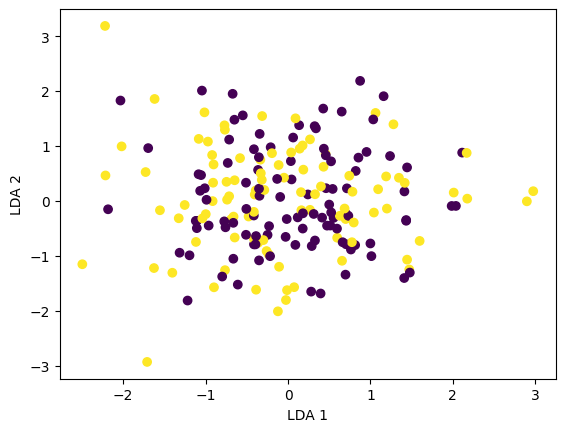

In [ ]:
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=df['label'])
plt.xlabel('LDA 1')
plt.ylabel('LDA 2')
plt.show()

We have displayed the same in a plot.

We see from the above plot "LDA1" is for feature1 taken on the x-axis and "LDA2" is for feature2 taken on the y-axis.

## ***Implementing Linear Discriminant Analysis (LDA) using the scikit-learn library in Python, and how can you leverage its functionalities to efficiently apply LDA for dimensionality reduction and classification in my machine learning project?***

We import the necessary libraries.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
np.random.seed(42)

n_samples = 200
X = np.random.randn(n_samples, 2)
y = np.random.randint(0, 2, n_samples)

df = pd.DataFrame(np.c_[X, y], columns=['feature_1', 'feature_2', 'label'])
df

,feature_1,feature_2,label
0,0.496714,-0.138264,0.0
1,0.647689,1.523030,0.0
2,-0.234153,-0.234137,0.0
3,1.579213,0.767435,0.0
4,-0.469474,0.542560,1.0
...,...,...,...
195,-0.898415,0.491919,1.0
196,-1.320233,1.831459,1.0
197,1.179440,-0.469176,1.0
198,-1.713135,1.353872,0.0


We take the same dataset as we took for the manual computation.

In [ ]:
# split the dataset into training and testing sets
X = df[['feature_1', 'feature_2']]
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

We split the variables, as x with feature1 and feature2 and y as label, to fit the model.

Here we do the splittting of training and testing data of ratio 70:30

In [ ]:
# create an LDA model and fit it to the training data
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

Then, we do the fitting of LinearDiscriminantAnalysis.

In [ ]:
# make predictions on the testing data
y_pred = lda.predict(X_test)

The predicted values of y is obatined.

In [ ]:
# evaluate the model's performance using a classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.51      1.00      0.67        30
         1.0       1.00      0.03      0.06        30

    accuracy                           0.52        60
   macro avg       0.75      0.52      0.37        60
weighted avg       0.75      0.52      0.37        60



We get the classification report on accuray, macro average and weighted avarage.

Accuracy is a common evaluation metric used to measure the overall performance of a classification model. It represents the proportion of correctly classified instances out of the total instances evaluated.

***The accuracy of our model is 52%.***




### ***Another example***

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


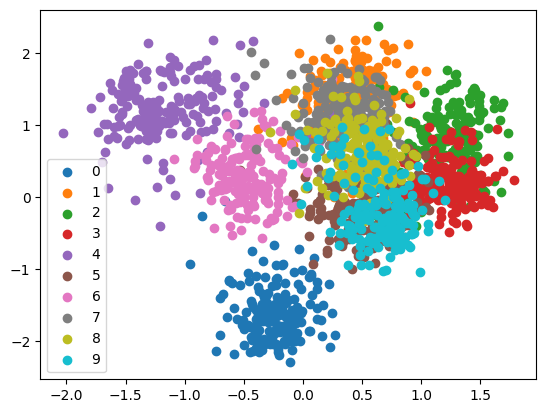

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# Load digits dataset
digits = load_digits()

# Extract features and labels
X = digits.data
y = digits.target

# Calculate mean and covariance matrix for each class
n_classes = len(np.unique(y))
means = np.zeros((n_classes, X.shape[1]))
covariances = np.zeros((n_classes, X.shape[1], X.shape[1]))
for i in range(n_classes):
    indices = np.where(y == i)[0]
    means[i] = np.mean(X[indices], axis=0)
    covariances[i] = np.cov(X[indices].T)

# Calculate within-class covariance matrix
W = np.zeros((X.shape[1], X.shape[1]))
for i in range(n_classes):
    W += covariances[i]
W = np.mean(covariances, axis=0) + np.eye(X.shape[1]) * 1e-5

# Calculate between-class covariance matrix
B = np.zeros((X.shape[1], X.shape[1]))
for i in range(n_classes):
    n_i = len(np.where(y == i)[0])
    m_i = means[i].reshape((1, X.shape[1]))
    B += n_i * np.outer(m_i - np.mean(means, axis=0), m_i - np.mean(means, axis=0))

# Calculate eigenvalues and eigenvectors of the matrix W^-1 * B
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(W).dot(B))

# Sort eigenvalues and eigenvectors in descending order
idx = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[idx]
eig_vecs = eig_vecs[:, idx]

# Select the first two eigenvectors
w = eig_vecs[:, :2]

# Project data onto the eigenvectors
X_lda = X.dot(w)

# Plot the first two LDA components
plt.figure()
for i in range(n_classes):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], label=i)
plt.legend()
plt.show()

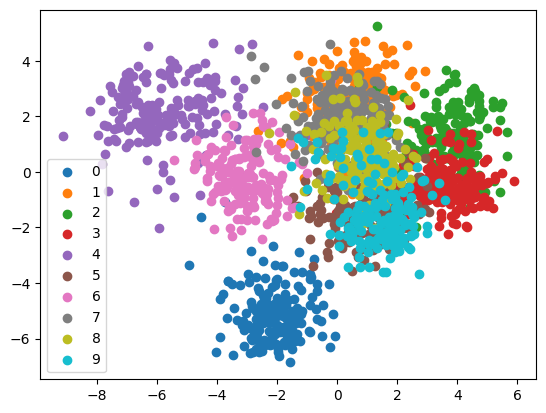

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load digits dataset
digits = load_digits()

# Extract features and labels
X = digits.data
y = digits.target

# Perform LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

# Plot the first two LDA components
plt.figure()
for i in range(10):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], label=i)
plt.legend()
plt.show()